In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer
name = "/mnt/efs/federicocassano/t_models/deepseekcoder-22b-taco-plain800k"
model = AutoModelForCausalLM.from_pretrained(name,  auto_map={
    "AutoConfig": "/mnt/efs/federicocassano/codeprm/training/deepseek_configs/expert_vis--configuration_deepseek.DeepseekV2Config",
    "AutoModel": "/mnt/efs/federicocassano/codeprm/training/deepseek_configs/expert_vis--modeling_deepseek.DeepseekV2Model",
    "AutoModelForCausalLM": "/mnt/efs/federicocassano/codeprm/training/deepseek_configs/expert_vis--modeling_deepseek.DeepseekV2ForCausalLM"
  },
).to("cuda:0")

The repository for /mnt/efs/federicocassano/t_models/deepseekcoder-22b-taco-plain800k contains custom code which must be executed to correctly load the model. You can inspect the repository content at https://hf.co//mnt/efs/federicocassano/t_models/deepseekcoder-22b-taco-plain800k.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N]  y
The repository for /mnt/efs/federicocassano/t_models/deepseekcoder-22b-taco-plain800k contains custom code which must be executed to correctly load the model. You can inspect the repository content at https://hf.co//mnt/efs/federicocassano/t_models/deepseekcoder-22b-taco-plain800k.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N]  y


Loading checkpoint shards:   0%|          | 0/13 [00:00<?, ?it/s]

In [2]:
tokenizer = AutoTokenizer.from_pretrained("codegenning/DeepSeek-Coder-V2-Lite-Base")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [3]:
import os
try:
    os.unlink("/tmp/stream")
except:
    pass
with open("/tmp/stream", "w") as f:
    f.write("")

In [11]:
import datasets
ds = datasets.load_dataset("codegenning/taco-rl", split="train")
print(ds)
ds[0]["prompt"]

Dataset({
    features: ['prompt', 'difficulty'],
    num_rows: 25776
})


'"""\nLittle Dormi received a histogram with $n$ bars of height $a_1, a_2, \\ldots, a_n$ for Christmas. However, the more he played with his new histogram, the more he realized its imperfections, so today he wanted to modify it to his liking.\n\nTo modify the histogram, Little Dormi is able to perform the following operation an arbitrary number of times:\n\nSelect an index $i$ ($1 \\le i \\le n$) where $a_i>0$, and assign $a_i := a_i-1$.\n\nLittle Dormi defines the ugliness score of his histogram (after performing some number of operations) as the sum of the vertical length of its outline and the number of operations he performed on it. And to make the histogram as perfect as possible, he would like to minimize the ugliness score after modifying it with some number of operations.\n\nHowever, as his histogram is very large, Little Dormi is having trouble minimizing the ugliness score, so as Little Dormi\'s older brother, help him find the minimal ugliness.\n\nConsider the following exam

In [ ]:
for ex in ds.select(range(35)):
    toks = tokenizer.encode(code, return_tensors="pt").to(model.device)
    outs = model.generate(toks, max_new_tokens=512, max_length=1024)

In [14]:
print(tokenizer.decode(outs[0][len(toks[0]):]))

import collections
n = int(input())
a = list(map(int, input().split()))
a.sort()
c = collections.Counter(a)
m = max(a)
ans = 0
for i in range(m, 0, -1):
	if c[i] == 0:
		continue
	for j in range(i * 2, m + 1, i):
		c[j] = 0
for i in a:
	if c[i] == 1:
		ans += 1
print(ans) <｜end▁of▁sentence｜>


In [15]:

with open("/tmp/stream", "r") as f:
    data = f.read()

In [ ]:
d = {i: 0 for i in range(0, 64)}

for x in data.strip().split(" "):
    x = int(x)
    d[x] += 1
d

(3090, 2910, 2841, 2757, 2647, 2566, 2513, 2499, 2488, 2407, 2369, 2319, 2299, 2283, 2247, 2231, 2213, 2212, 2209, 2197, 2185, 2184, 2181, 2163, 2156, 2062, 2050, 2049, 2015, 2002, 2001, 1992, 1939, 1889, 1871, 1865, 1851, 1848, 1847, 1834, 1801, 1797, 1791, 1782, 1762, 1750, 1728, 1651, 1648, 1634, 1633, 1606, 1604, 1598, 1562, 1538, 1532, 1522, 1505, 1459, 1420, 1222, 1121, 1037)


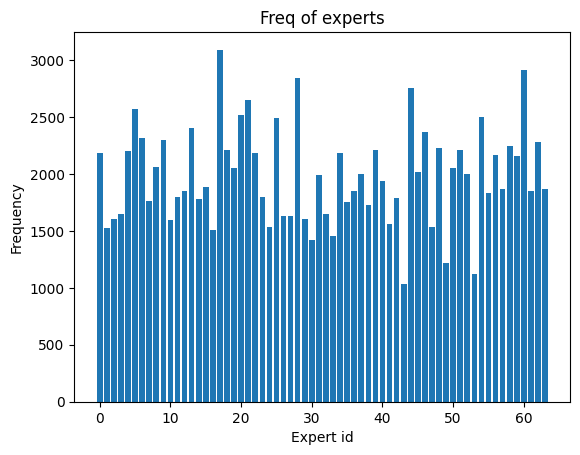

In [24]:
import matplotlib.pyplot as plt

sorted_items = sorted(d.items(), key=lambda item: item[1], reverse=True)

keys, values = zip(*sorted_items) 

print(values)

plt.bar(keys, values)
plt.xlabel('Expert id')
plt.ylabel('Frequency')
plt.title('Freq of experts')
plt.show()